In [25]:
import pandas as pd
link =  r'C:\Users\moses\Downloads\JobsHistory.csv'
df = pd.read_csv(link)a
df.head()

,E1001,08/01/2000,100,2
0,E1002,08/01/2001,200,5
1,E1003,08/16/2001,300,5
2,E1004,08/16/2000,400,5
3,E1005,05/30/2000,500,2
4,E1006,08/16/2001,600,2


In [1]:
#importing needed libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
print("matplotlib version", mpl.__version__)
path = ('C:\\Users\moses\Downloads\Immigration to Canada from 1980 to 2013.csv')
dataframe = pd.read_csv(path)
dataframe.head()

matplotlib version 3.5.3


,Unnamed: 0,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,...,1450,1223,856,702,560,716,561,539,620,603
2,2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,...,0,0,1,0,0,0,0,0,0,0
4,4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,...,0,0,1,1,0,0,0,0,1,1


In [3]:
dataframe.drop(['REG','AREA','DEV','DevName','Type','Coverage'], axis = 1, inplace = True)
dataframe['Total'] = dataframe.sum(axis = 1)


C:\Users\moses\AppData\Local\Temp\ipykernel_12844\3226577741.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe['Total'] = dataframe.sum(axis = 1)


In [ ]:
dataframe.rename(columns={'AreaName':'Continent','OdName':'Country','RegName':'Region'}, inplace=True)
print("no error")
dataframe.set_index('Country', inplace=True)
dataframe.head()

In [5]:
dataframe.drop(['Unnamed: 0'], axis = 1, inplace = True)
dataframe.columns = list(map(str, dataframe.columns))
years = list(map(str, range(1980,2014)))
dataframe.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15700
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69441
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,9
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,19


In [ ]:
# we can use the sum() method to get the total population per year
df = pd.DataFrame(dataframe[years].sum(axis=0))
df.index = map(int, df.index)
df.reset_index(inplace = True)
df.columns = ['year', 'total']
df

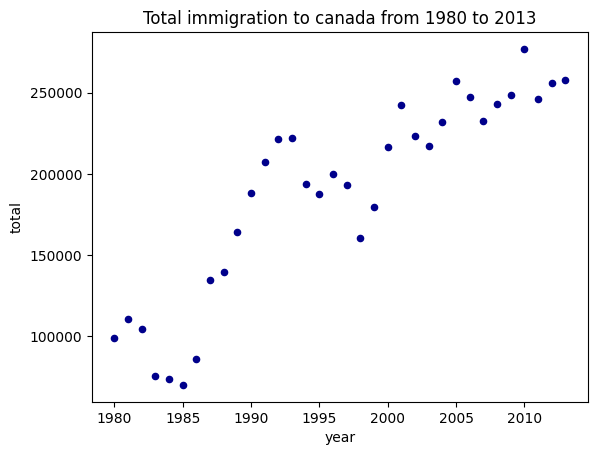

In [14]:
df.plot(kind = 'scatter', x = 'year', y = 'total', color = 'darkblue')

plt.title("Total immigration to canada from 1980 to 2013")
plt.xlabel('year')
plt.ylabel('total')

plt.show()

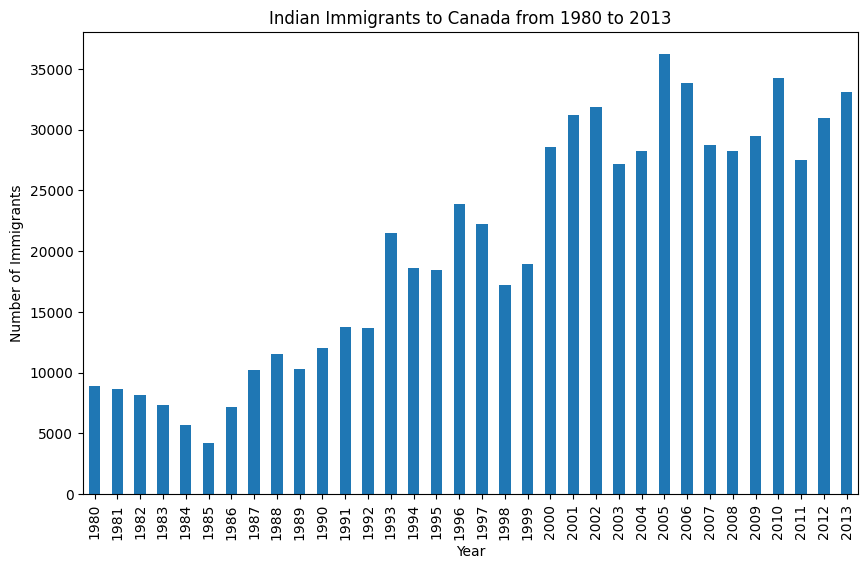

In [20]:
df_india = dataframe.loc['India', years]
df_india.plot(kind='bar', figsize=(10, 6), rot=90)



plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Indian Immigrants to Canada from 1980 to 2013')


plt.show()

In [22]:
# group countries by continents and apply sum() function 
df_continents = dataframe.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(dataframe.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


C:\Users\moses\AppData\Local\Temp\ipykernel_12844\825993526.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = dataframe.groupby('Continent', axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,624194
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3322717
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1415161
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,767870
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241359


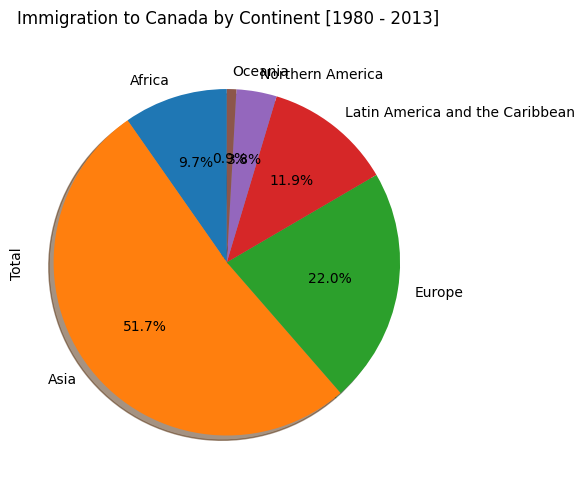

In [27]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,    
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')
plt.show()

In [30]:
df_frame = dataframe.loc[['India','Algeria'], years]
df_frame = df_frame.transpose()

Text(0.5, 0, 'Years')

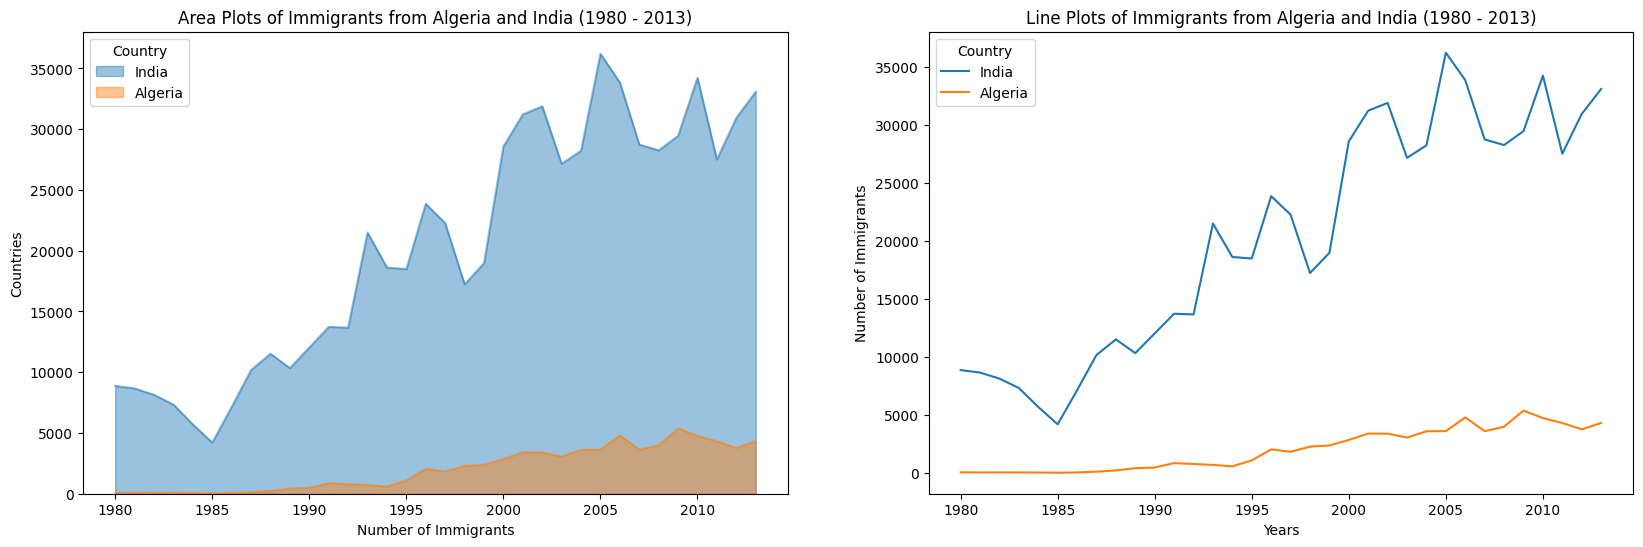

In [35]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2) 


df_frame.plot(kind='area',stacked = False, figsize=(20, 6), ax=ax0, alpha = 0.45)
ax0.set_title('Area Plots of Immigrants from Algeria and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')


df_frame.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of Immigrants from Algeria and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')